# Regressão Linear Múltipla

- EDA

- Preparação dos dados

- Criação do modelo

- Avaliação modelo

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', None)

pd.options.display.max_columns = 30 # alterando a quantidade de colunas NA VISUALIZAÇÃO

Na regressão linear múltipla, temos o modelo como: $Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n$

#### Exemplo 2

Para o exemplo de Regressão Linear Múltipla, iremos utilizar o dataset *Car_Prices.csv*, onde o objetivo é estimar o preço dos carros a partir de suas características.


Problem Description
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Alternativa de solução (incluindo exploração dos dados):

https://www.kaggle.com/dronax/car-prices-dataset/notebook

In [3]:
cars = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo4/Datasets/CarPrice_Assignment.csv')

In [10]:
cars.drop(columns=['drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'],
          inplace=True) #excluindo pq eu quero
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


- EDA

In [11]:
# Algumas estatísticas interessantes sobre o dataset
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
# Por curiosidade, vamos ver como está os valores desses carros
cars[['CarName', 'price']].sort_values(['price'],ascending=False)

,CarName,price
74,buick regal sport coupe (turbo),45400.0
16,bmw x5,41315.0
73,buick century special,40960.0
128,porsche boxter,37028.0
17,bmw x3,36880.0
...,...,...
76,mitsubishi mirage,5389.0
150,toyota corona mark ii,5348.0
50,maxda rx3,5195.0
18,chevrolet impala,5151.0


<Figure size 864x576 with 0 Axes>

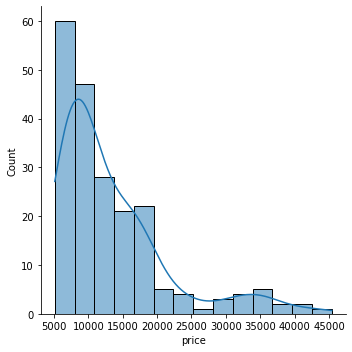

In [13]:
# dê uma olhada na distribuição dos preços "price"
plt.figure(figsize=(12,8))
sns.displot(cars["price"], kde=True)
plt.show()

In [14]:
#Olhando os tipos de variáveis que temos na base
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber       object
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

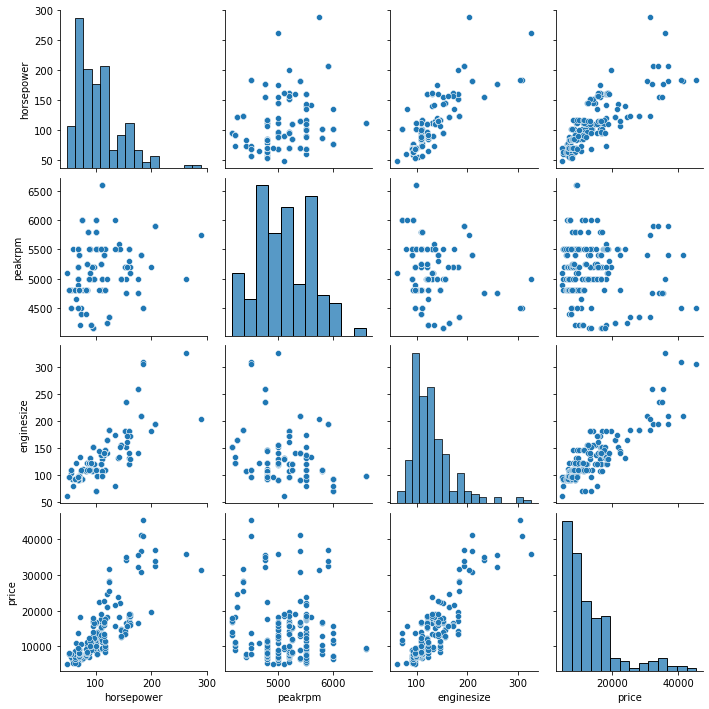

In [28]:
# Features numéricas
sns.pairplot(data=cars[[ 'horsepower', 'peakrpm', 'enginesize', 'price']])

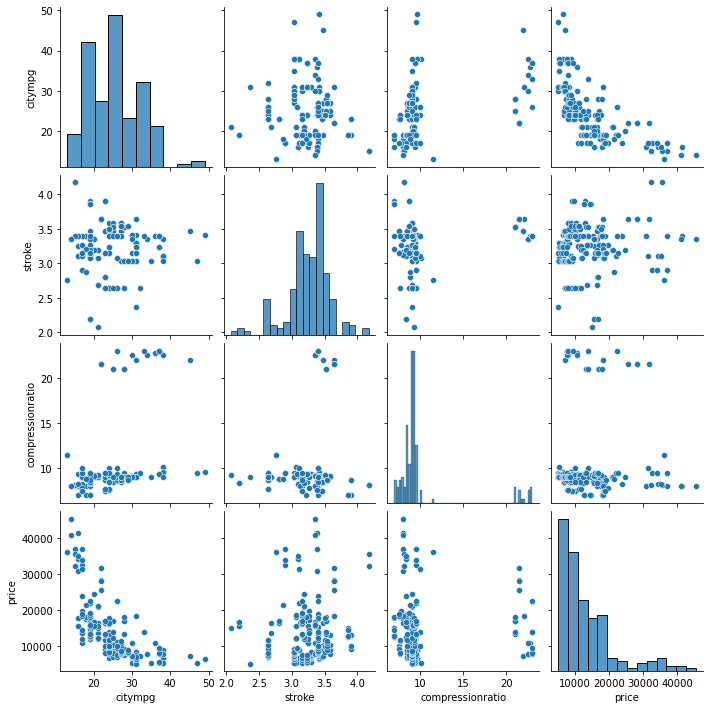

In [18]:
sns.pairplot(data=cars[[ 'citympg',  'stroke', 'compressionratio', 'price']])

In [23]:
cars.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

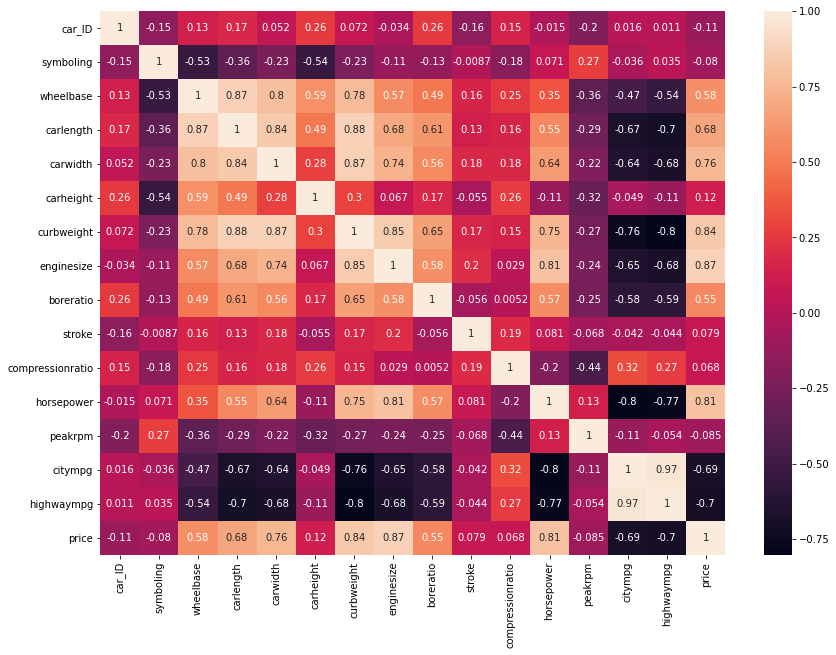

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(cars.corr(), annot=True)

In [27]:
# Features categóricas ou em forma de string
cars[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'cylindernumber']].head(100)

,CarName,fueltype,aspiration,doornumber,carbody,cylindernumber
0,alfa-romero giulia,gas,std,two,convertible,four
1,alfa-romero stelvio,gas,std,two,convertible,four
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,six
3,audi 100 ls,gas,std,four,sedan,four
4,audi 100ls,gas,std,four,sedan,five
...,...,...,...,...,...,...
95,nissan juke,gas,std,two,hatchback,four
96,nissan latio,gas,std,four,sedan,four
97,nissan note,gas,std,four,wagon,four
98,nissan clipper,gas,std,two,hardtop,four


- Pre processamento / preparação dos dados (limpeza dos dados, outliers, transf categorias em números-dummies)

Importante levantar que a regressão linear, seja ela simples ou múltipla, só suporta valores númericos. Dessa forma devemos tratar os dados categóricos da nossa base. 

In [30]:
cars['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [32]:
# label encoder
cars.loc[cars['cylindernumber']=='four', 'ncilindros'] = 4
cars.loc[cars['cylindernumber']=='six', 'ncilindros'] = 6
cars.loc[cars['cylindernumber']=='five', 'ncilindros'] = 5
cars.loc[cars['cylindernumber']=='eight', 'ncilindros'] = 8
cars.loc[cars['cylindernumber']=='two', 'ncilindros'] = 2
cars.loc[cars['cylindernumber']=='three', 'ncilindros'] = 3
cars.loc[cars['cylindernumber']=='twelve', 'ncilindros'] = 12



Nesse exercícios vamos utilizar a função [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), onde esta função transforma as variáveis categóricas em diversas colunas no DataFrame para cada uma das opções de categoria:



In [36]:
cars['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [33]:
cars_with_dummies = pd.get_dummies(cars, prefix_sep='_', columns=['fueltype', 
                                                                  'aspiration', 
                                                                  'doornumber', 
                                                                  'carbody'])

In [37]:
# Vamos dar uma olhada no que aconteceu com a base
cars_with_dummies.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,ncilindros,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,4.0,0,1,1,0,0,1,1,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,4.0,0,1,1,0,0,1,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,6.0,0,1,1,0,0,1,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,4.0,0,1,1,0,1,0,0,0,0,1,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,5.0,0,1,1,0,1,0,0,0,0,1,0


- Criação do modelo

Uma tecninca para impedir o overfit é separar o conjunto em dois grupos um para treino e outro para teste, assim o algoritmo aprende apenas olhando um conjuto e testa sua equação em outros. Testando em dados que o algoritmo nunca conheceu permite uma verificação mais precisa de sua equação.

Para isto vamos utilizar a função train_test_split do sklearn, que, dado um conjunto x e y, ela retorna quarto grupos de valores. Por padrão ela separa 25% dos dados para treino e 75% para teste.

Com isto conseguimos calcular um valor de erro mais correto.

Preparado a base, primeiro passo **importante** para podermos usar os dados no modelo é separar o dados em base de treino e teste (ou em alguns casos validação), onde a divisão fica da seguinte forma:
- **X :** todos os dados dispovínel sobre a dado que utilizamos exceto a resposta;
- **y :** Variável de resposta da nossa base.

In [41]:
X = cars_with_dummies.drop(['car_ID', 'CarName', 'price','cylindernumber'], axis = 1) #features, atributos, características
y = cars_with_dummies['price'] # target, classe, dependente

In [42]:
X # características do carro

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,ncilindros,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,4.0,0,1,1,0,0,1,1,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,4.0,0,1,1,0,0,1,1,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,6.0,0,1,1,0,0,1,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,4.0,0,1,1,0,1,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,5.0,0,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,4.0,0,1,1,0,1,0,0,0,0,1,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,4.0,0,1,0,1,1,0,0,0,0,1,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,6.0,0,1,1,0,1,0,0,0,0,1,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,6.0,1,0,0,1,1,0,0,0,0,1,0


In [43]:
y # var objetivo que é o preço

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Vamos utilizar para a separação da base em treino e teste a função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), onde os parâmetros da função que mais iremos utlizar são:
- **test_size:** Defini a porcentagem que será separada para a base de teste;
- **random_state:** Seed de aleatoriadade, para garantir a reprodutibilidade.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 26), (62, 26), (143,), (62,))

Para o caso da Regressão Linear Múltipla, iremos utilizar a biblioteca do Scikit-Learn chamada [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression):

In [46]:
from sklearn.linear_model import LinearRegression

# Instancia o modelo
model = LinearRegression()  #modelo, model, lr, linreg

# Fit(ajuste) dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test)

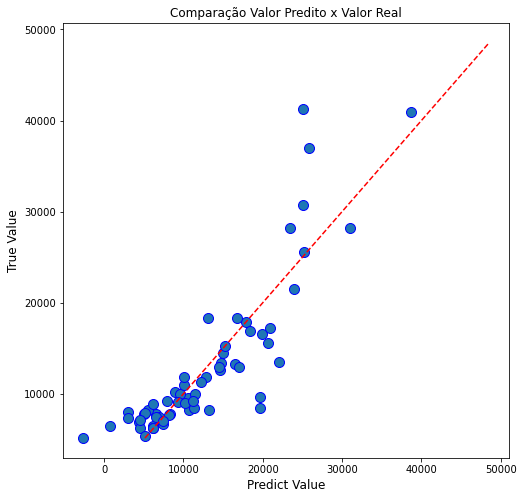

In [48]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

Vamos calcular o R2 para o modelo, importando a métrica [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) diretamente do Scikit_Learn.

In [49]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7390964069560353


Algo interessante que podemos fazer com o modelo é definir quais variáveis são as mais relevantes na hora da predição dos valores, ou seja quais variáveis têm maiores coeficientes. Esse processo é muito recorrente em Machine Learning e é chamado de **Feature Importance**.

O processo de engenharia de recursos envolve a seleção dos recursos mínimos necessários para produzir um modelo válido porque quanto mais recursos um modelo contém, mais complexo ele é (e mais esparsos os dados), portanto, mais sensível é o modelo a erros devido à variação. Uma abordagem comum para eliminar recursos é descrever sua importância relativa para um modelo e, em seguida, eliminar recursos ou combinações de recursos fracos e reavaliar para ver se o modelo se sai melhor durante a validação cruzada.

In [50]:
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

,Features,Scores
0,carbody_hardtop,5502.497984
1,fueltype_gas,1823.710909
2,carbody_convertible,1590.181190
3,carwidth,872.083485
4,compressionratio,409.293023
5,doornumber_four,196.236680
6,aspiration_turbo,164.687808
7,carheight,156.950562
8,wheelbase,151.654139
9,enginesize,99.163352


<AxesSubplot:xlabel='Scores', ylabel='Features'>

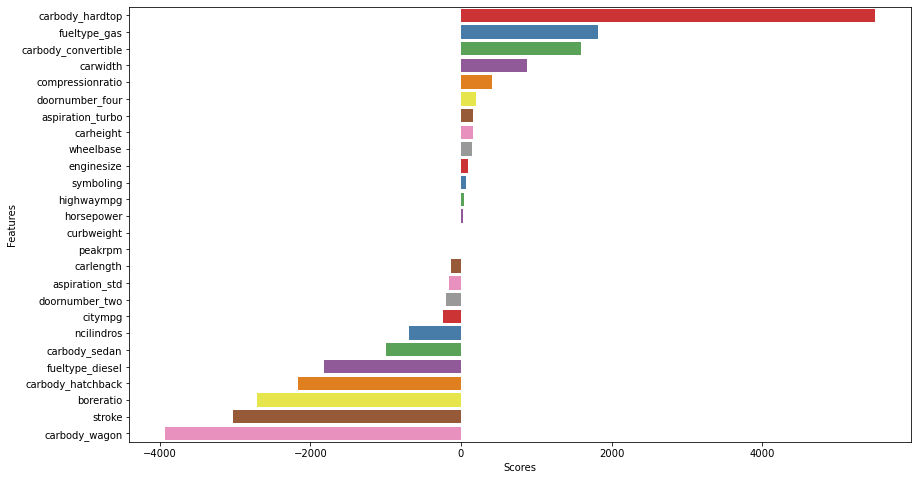

In [53]:
plt.figure(figsize=(14,8))
sns.barplot(x='Scores', y='Features', data=df_features, palette='Set1')

Tentem tirar algumas variáveis para aumentar a eficiência do modelo (score)

## Resíduos

1. Não devem ser correlacionados

2. Ter média zero

3. Distribuição normal dos resíduos

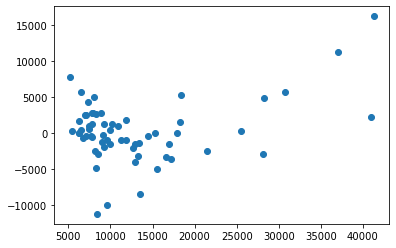

In [54]:
residuos = y_test - y_pred

plt.scatter(y_test, residuos)

In [55]:
residuos.mean()

240.2525745657616

In [56]:
from scipy.stats import normaltest
normaltest(residuos)

NormaltestResult(statistic=13.315938894701526, pvalue=0.0012837504485047693)

<AxesSubplot:xlabel='price', ylabel='Count'>

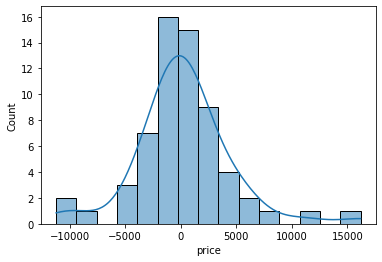

In [57]:
sns.histplot(residuos, kde=True)

In [62]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     49.75
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           6.96e-50
Time:                        20:39:41   Log-Likelihood:                -1319.1
No. Observations:                 143   AIC:                             2684.
Df Residuals:                     120   BIC:                             2752.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
symboling              66.0991    

Por curiosidade do Ivan -> o que enviar para a produção

In [60]:
model # modelo treinado -> joblib ou pickle - salvar o modelo e restaurar